<a href="https://colab.research.google.com/github/jurados/RECAcenso/blob/main/analisis_base_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Funciones de Google

El siguiente codigo permite montar nuestro drive como *gdrive*, dentro del cual se encuentran nuestros datos.

PD: Es necesario darl *click* en el enlace que aparece, seleccionar la cuenta de google con la cual se esta trabajando y copiar y pegar el codigo que aparece dentro del espacio en blanco para permitir el acceso.

In [ ]:
from google.colab import files
from google.colab import drive
drive.mount('/gdrive',force_remount=True)
%cd /gdrive.

In [ ]:
#####################################################################
# Instalación de los paquetes necesearios para relizar las graficas #
#####################################################################

#!pip install --upgrade matplotlib # Actulizamos a la ultima version de matplotlib
!pip install --upgrade -q gspread  # Con este se logra utilizar los gsheet
!pip install geopandas             # Con este se puede utilizar los mapas
!pip install plotly
!pip install seaborn

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

La siguiente celda de codigo es para poder abrir el archivo de *Google Sheet* donde se encuentra la tabla de datos.


In [ ]:
import gspread
from oauth2client.client import GoogleCredentials
from google.colab import auth

auth.authenticate_user()
gc = gspread.authorize(GoogleCredentials.get_application_default())

# New Section

# Descripción del Notebook

**Convenciones**

El nombre asociado a cada `gsheet` tienen el nombre de: 

 - **df1_atributo**

donde *atributo* hace referencia al nombre del archivo que los diferencía de los otros.

 - En el nombre de las variable, todo en minúscula ej: lista
 - Si la variable tiene dos o más palabras para definirlas se usa un guion bajo (_) para separar las palabras
 - En la funciones se usara la primera letra en mayúscula.  
 - Si la función tiene dos o más palabras para definirlas se usa un guion bajo (_) para separar las palabras
 - La figura correspondiente trenda como indicativo `fig#` donde `#` se referencia a la figura del mismo *dataset*
 - Los ejes de las figuras correspondiente trenda como indicativo `ax#` donde `#` se referencia a la figura del mismo *dataset*

## Colores

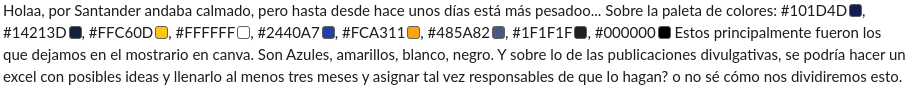

##SOBRE EL CENSO:
-Ciudad origen

-Género

-Edad

-Condición

-Áreas de investigación?? esta es la más difícil de sacar, pq muchos marcaron varias, pero se pueeede....

-Dónde están actualmente

-Bajo que parámetros volver a Colombia (los que están fuera)

La siguiente tabla muestra la distribución de los investigadores con respecto a su género

|  Género   | Número de Personas |
|-----------|--------------------|
| Mujer     | 96                 |
| Hombre    | 68                 |
| No binario | 1 |
| **Total** | 165                |

La siguiente tabla muestra la distribución de los investigadores con respecto al rango de sus edades y el género

| Rango de edades | Número de Peronas | Mujeres | Hombres |
|-----------------|-------------------|---------|---------|
| $<20$           | 7                 | 4       | 3       |
| $20 - 29$       | 81                | 36      | 44      |
| $30 - 39$       | 53                | 26      | 27      |
| $40 - 49$       | 18                | 2       | 16      |
| $50 - 59$       | 3                 | 0       | 3       |
| $60 - 69$       | 1                 | 0       | 1       |
| **Total**       | 163               | 68      | 94      |

| Condición actual | # Personas |
|------------------|:------------:|
| Estudiante Doctorado | 35 |
| Estudiante Maestría  | 19 |
| Estudiante Pregrado | 48 |
| Postdoc/Fellow  | 14 |
| Profesor(a)/ Tenure track | 24 |
| No se encuentra vinculado actualmente a la academía | 23 |

La siguiente tabla muestra el lugar de procedencia de las personas dentro de colombia dependiendo del departamento

|    Departamento    | Número de Personas |    Departamento    | Número de Personas |
|--------------------|:--------------------:|--------------------|:--------------------:|
| Antioquia          | 33                 | Córdoba            | 2                  |
| Atlátinco          | 2                  | Huila              | 1                  |
| Bolivar            | 2                  | Nariño             | 2                  |
| Boyacá             | 5                  | Norte de Santander | 4                  |
| Cundinamarca       | 75                 | Meta               | 2                  |
| Caldas             | 6                  | Risaralda          | 2                  |
| Casanare           | 1                  | Santander          | 14                 |
| Cauca              | 2                  | Sucre              | 1                  |
| Cesar              | 2                  | Valle del Cauca    | 7                  |

La siguiente tabla muestra la distribución de los de los investigadores en la Tierra con respecto al país donde realizan sus estudios y/o trabajos principalmente

| Países | Números de Personas | Países | Números de Personas | 
|----------------|:---------------------:|---------|:--------:|
| Alemania  | 8   | Estados Unidos | 10 | 
| Argentina | 3   | Francia        | 3  | 
| Australia | 3   | Italia         | 1  | 
| Austria   | 3   | Japon          | 1  |  
| Brasil    | 2   | México         | 12 |
| Belgica   | 1   | Noruega        | 2  | 
| Canada    | 1   | Países Bajos   | 3  |
| Chile     | 4   | Puerto Rico    | 1  | 
| China     | 1   | Reino Unido    | 3  | 
| Colombia  | 105 | Rusia          | 3  |
| Dinamarca | 1   | Suiza          | 1  |  
| España    | 1   | 

La siguiente tabla muestra la distribución de los de los investigadores en la Tierra con respecto al país donde realizan sus estudios y/o trabajos principalmente

| Países | Números de Personas | Mujeres | Hombre | Países | Números de Personas | Mujeres | Hombre |
|----------------|:---------------------:|---------|--------|----------------|:---------------------:|---------|--------|
| Alemania  | 8   | 7  | 1  | Estados Unidos | 10 | 5 | 5 |
| Argentina | 3   | 0  | 3  | Francia        | 3  | 2 | 1 |
| Australia | 3   | 2  | 1  | Italia         | 1  | 1 | 0 |
| Austria   | 3   | 0  | 1  | Japon          | 1  | 1 | 0 |
| Brasil    | 2   | 1  | 1  | México         | 12 | 6 | 6 |
| Belgica   | 1   | 0  | 1  | Noruega        | 2  | 1 | 1 |
| Canada    | 1   | 1  | 0  | Países Bajos   | 3  | 2 | 1 |
| Chile     | 4   | 3  | 1  | Puerto Rico    | 1  | 1 | 0 |
| China     | 1   | 0  | 1  | Reino Unido    | 3  | 2 | 1 |
| Colombia  | 105 | 33 | 71 | Rusia          | 3  | 1 | 0 |
| Dinamarca | 1   | 1  | 0  | Suiza          | 1  | 1 | 0 |
| España    | 1   | 1  | 0  | 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
worksheet = gc.open_by_url('https://docs.google.com/spreadsheets/d/1gLFJm4c7NW2V0VsiPlPITYXKJt4ntzGuXcuPrSBOB1w/edit#gid=1203099345').sheet1
#worksheet = gc.open('/gdrive/MyDrive/Encuestas/Contact_Information_V2_RECA(Responses)').sheet1
rows = worksheet.get_all_values()
print(rows)

In [ ]:
data = pd.DataFrame.from_records(rows)
data.shape

In [ ]:
print(list(data))
data.columns = data.iloc[0]
print(list(data))

In [ ]:
# Partimos el dataset distinguiendo hombres y mujeres:
Mujeres = data.loc[(data == 'Mujer').any(axis=1)]  # Tiene todos los datos de las mujeres
Hombres = data.loc[(data == 'Hombre').any(axis=1)] # Tiene todos los datos de los hombres

# Se obtienen las edades
Edades = data.groupby(['Edad']).size()
Edades = Edades[:-1]
edades_mujer = Mujeres.groupby(['Edad']).size()
edades_hombre = Hombres.groupby(['Edad']).size()

## Poster

In [ ]:
#Pais_Actual = data.groupby(['¿En qué país realiza sus estudios/trabajo principalmente?']).size()
#print(Pais_Actual)
#print(Mujeres.groupby(['¿En qué país realiza sus estudios/trabajo principalmente?']).size())
#print(Hombres.groupby(['¿En qué país realiza sus estudios/trabajo principalmente?']).size())

### Genero

In [ ]:
labels  = ['Mujeres','Hombres','No-binarios']
size    = [Mujeres.shape[0],Hombres.shape[0],1]
colors  = ['#FFC60D','#101DAD','#d00000']
#explode = [0.05,0.05,0]

figure, ax = plt.subplots()

patches, texts, autotexts = ax.pie(size,
        #explode = explode,
        labels = labels,autopct=('%1.f%%'),
        colors = colors,
        labeldistance=1.2)

for text in texts:
    text.set_color('black')
    #text.set_weight('900')
    text.set_size(15)
for autotext in autotexts:
    autotext.set_color('black')
    autotext.set_weight('200')
    #autotext.set_size(15)
autotexts[0].set_size(15)
autotexts[0].set_position((0.3,0.7))
autotexts[1].set_position((-0.1,-0.7))
autotexts[1].set_size(15)
autotexts[2].set_position((0.8,0))
autotexts[2].set_size(15)

text = 'Total \n'+str(sum(size))
ax.text(0., 0., text, 
        horizontalalignment='center', 
        verticalalignment='center',
        size=20)
        #fontname='Helvetica')
ax.axis('equal')

my_circle=plt.Circle( (0,0), 0.5, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.tight_layout()

plt.savefig('figura1.png',dpi=300)
files.download('figura1.png')

### Edades

In [ ]:
# Aquí reorganizamos las edades de hombre y mujeres de tal manera que comience
# con el label "<20".
edades_h2 = np.array([2, 39, 25, 16, 2, 1])
edades_m = np.array([2, 34, 26, 2, 0, 0])
#print("Edades de hombres\n",edades_h)
#print("Edades de mujeres\n",edades_m)

In [ ]:
# Modificamos los labels
labels = ['<20','20-29', '30-39', '40-49', '50-59', '60-69']
x = np.arange(len(labels))  # the label locations
width = 0.35

fig, ax = plt.subplots(figsize=(10,8))

rects1 = ax.bar(x - width/2, edades_h2, width, color = '#161DAD')#, label='Hombre'
rects2 = ax.bar(x + width/2, edades_m, width, color = '#FFC60D')#, label='Mujer'
ax.set_xlabel('Rango de edades [días]', size=20, labelpad=10)
ax.set_ylabel('Número de miembros', size=20, labelpad=10)
#ax.set_title('Age-gender distribution', size = 25)
ax.set_xticks(x)
ax.set_xticklabels(labels,size=15)
ax.tick_params(direction='in')
ax.tick_params(axis='y',labelsize=15)
#ax.set_ylabel.set_fontsize(15)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#ax.spines['left'].set_visible(False)

#ax.grid(axis='y', linewidth = 0.5) #,linestyle='--'

# Estas dos funciones necesitan la actualización de matplotlib
#ax.bar_label(rects1, label_type='edge', size = 13)
#ax.bar_label(rects2, label_type='edge', size = 13)

#plt.show()
plt.savefig('figura2.pdf')
files.download('figura2.pdf')

In [ ]:
# Creación del mapa de color para RECA y gráfico de Donut:
from matplotlib.colors import LinearSegmentedColormap, ListedColormap

### Condición

In [ ]:
cond_M = Mujeres.groupby(['Especifique su condición actual']).size()
cond_H = Hombres.groupby(['Especifique su condición actual']).size()
#1. Concateno los dos dataframe *pd.concat()
#2. Renombra las columnas 0 y 1 como 'Mujeres', 'Hombres' respectivamente: DataFrame.rename()
result = pd.concat([cond_M, cond_H], axis=1).rename(columns={0:'Mujeres',1:'Hombres'}) 
label_in = list("MH")*6      # etiquetas de las donas internas

In [ ]:
cmap1 = plt.get_cmap('Set1')
cmap2 = plt.get_cmap('Pastel1')
# Luego de llamar el mapa de color, debo espicificar que colores voy a tomar de dicho mapa.
# Para eso, creo una variable donde llama los valores del mapa por color por los indices, como se sigue:

outcmap = cmap1(np.arange(6)) # Indices de los colores del mapa de color,  [0,1,2,...,5]
incmap  = cmap2([0,1]*12)     # Para Hombre Mujer, segundo colormap indices de 
                              # colores escogidos son: [0,1,0,1,...,1]

In [ ]:
cmap1 = plt.get_cmap('cool',6)
outcmap = cmap1(np.arange(6))
incmap = cmap2([0,1]*12) # Hombre Mujer
fig, ax = plt.subplots(figsize=(10,10))

size = 0.3
vals = result.values

ax.pie(vals.sum(axis=1), radius=1, colors=outcmap, labels=labelspie,
       wedgeprops=dict(width=2*size, edgecolor='w'))

plt.savefig("condicion_post.png",dpi=100,transparent=True)
plt.show()

### Ciudad de Origen

In [ ]:
col = gpd.read_file('/gdrive/MyDrive/Encuestas/mapa_colombia')#.to_crs(epsg=3116)
col.head(34)

In [ ]:
Ciudad_Origen_M = Mujeres.groupby(['Ciudad de Origen en Colombia']).size()
Ciudad_Origen_H = Hombres.groupby(['Ciudad de Origen en Colombia']).size()
Ciudad_Origen = data.groupby(['Ciudad de Origen en Colombia']).size()
#Ciudad_Origen

In [ ]:
points = np.array(Ciudad_Origen)
points = points[1::]
point_relative_size = 5*np.sqrt(points) #5*abs(np.log10(points/np.sum(points)))
print(points, point_relative_size)

In [ ]:
Pobla = np.zeros(33)
Pobla[32] = 2
Pobla[25] = 75
Pobla[27] = 75
Pobla[30] = 14
Pobla[3] = 7
Pobla[17] = 2
Pobla[26] = 4
Pobla[10] = 6
Pobla[13] = 34
Pobla[16] = 2
Pobla[29] = 1
Pobla[15] = 2
Pobla[12] = 2
Pobla[1] = 2
Pobla[21] = 1
Pobla[24] = 5
Pobla[18] = 2
Pobla[28] = 2
Pobla[6] = 1
indexd = np.array([2, 75, 14, 7, 2, 4, 6, 34, 2, 1, 2,2,2,1,5,2,2,1]).astype('int')

In [ ]:
Ciudades_L = Ciudad_Origen.index
LAT_L = [10.96854, 4.60971,  7.12539, 3.43722, 10.39972, 7.89391,  5.06889, 6.25184, 8.74798, 2.9273, 1.21361, 4.81333,  2.43823, 9.30472,  5.53528, 10.46314, 4.142, 5.33775]
LON_L = [-74.78132, -74.08175, -73.1198,  -76.5225, -75.51444, -72.50782, -75.51738, -75.56359, -75.88143, -75.28189, -77.28111, -75.69611, -76.61316, -75.39778, -73.36778, -73.25322, -73.62664,  -72.39586]
Departamentos_L = ['Atlántico', 'Cundinamarca', 'Santander', 'Valle del Cauca', 'Bolivar', 'Norte de Santander',
       'Caldas', 'Antioquia', 'Córdoba', 'Huila', 'Nariño', 'Risaralda',
       'Cauca', 'Sucre', 'Boyacá', 'Cesar', 'Meta',
       'Casanare']
#print(len(LAT_L),len(LON_L),len(Ciudades_L))
print(len(Departamentos_L))
Orden_Circular = [6,18,3,13,7,4,11,10,9,16,14,12,15,8,2,5,17,1] # Este es el orden segun la grafica de colombia.png
#para que se ajusten las flechas a los circulos y no se vea enredado
data_Dept = {'name':Departamentos_L, 'LON':LON_L, 'LAT':LAT_L, 'Poblacion':indexd, 'Orden':Orden_Circular}
df_Depts = pd.DataFrame(data_Dept)
# Primero ordeno por los valores de 'Orden' y luego reseteo el indice sin anadirlo como columna nueva
df_Depts = df_Depts.sort_values(by='Orden').reset_index(drop=True)
df_Depts

In [ ]:
col['Poblacion'] = Pobla.astype('int')
col.head()

df_colsi = col.loc[col['Poblacion'] == 0]
df_colno = col.loc[~(col['Poblacion'] == 0)]

In [ ]:
from matplotlib import cm

cmap = cm.get_cmap('OrRd',18)
cmap2 = cmap(np.arange(18))

In [ ]:
θ = np.linspace(0,360,19)*np.pi/180
R = 8
in_X = LON_L[1] + R*np.cos(θ) 
in_Y = LAT_L[1] + R*np.sin(θ) 

cmap = cm.get_cmap('summer',9)
cmap2 = cmap(np.arange(9))

In [ ]:
fig, ax = plt.subplots(figsize=(15,16))
# Añade ax para San Andrés
#ax_san = fig.add_axes([0.25, 0.75, 0.05, 0.1])
# Añade ax para Providencia
#ax_prov = fig.add_axes([0.29, 0.77, 0.08, 0.08])

# Grafica Parte continental
#col.plot(ax=ax , color='white', edgecolor = 'black')
df_colsi.plot(ax=ax, color='lightgray', edgecolor = 'white')
df_colno.plot(ax=ax, column='Poblacion', cmap='cividis', categorical=True, edgecolor='gray')#,legend=True)

# Grafica San Andrés
#col.plot(ax=ax_san, color='white', edgecolor = 'black')
# Grafica Providencia
#col.plot(ax=ax_prov, color='white', edgecolor = 'black')
'''
for i in range(len(LON_L)):
    a = int(np.ceil(df_Depts['Poblacion'][i]*(9/75)))-1
    p0 = Circle((LON_L[i],LAT_L[i]), 0.1, color='red')
    p = Circle((in_X[i],in_Y[i]), 0.3, color=cmap2[a])
    ax.add_artist(p0)
    ax.add_artist(p)
    
    if(in_X[i]<= -74):
        ax.annotate(
        "{0}".format(df_Depts['Poblacion'][i]),
        xy=(df_Depts['LON'][i], df_Depts['LAT'][i]), xycoords='data',
        xytext=(in_X[i], in_Y[i]), textcoords='data',
        ha='center', va='center', color='#02FDF8',
        arrowprops=dict(
            arrowstyle="<-",
            shrinkA=0.05, shrinkB=10,
            connectionstyle="arc3,rad=0.3"))
    else:
        ax.annotate(
        "{0}".format(df_Depts['Poblacion'][i]),
        xy=(df_Depts['LON'][i], df_Depts['LAT'][i]), xycoords='data',
        xytext=(in_X[i], in_Y[i]), textcoords='data',
        ha='center', va='center', color='#02FDF8',
        arrowprops=dict(
            arrowstyle="<-",
            shrinkA=0.05, shrinkB=10,
            connectionstyle="arc3,rad=0.3"))
        
'''   

# Limita los valores del eje x e y para cada gráfica
#ax.set(ylim=(0, 1_900_000), xlim=(400_000, 1_850_000), yticks=[], xticks=[])
#ax_san.set(ylim=(1_883_000, 1_902_000), xlim=(163_000, 172_000), yticks=[], xticks=[])
#ax_prov.set(ylim=(1_975_000, 1_990_000), xlim=(204_044, 211_100), yticks=[], xticks=[])

# Tamaño final de la gráfica
# fig.set_size_inches(10, 10)
ax.axis('off')
plt.savefig('colombia.png',dpi=100,facecolor='white')

### Donde se encuentran

In [ ]:
#Grafico colombia para poster.
fig11, ax11 = plt.subplots(figsize=(10,11))

# Grafica Parte continental

df_colsi.plot(ax=ax11, color='#0ae8ce', edgecolor = 'white')
df_colno.plot(ax=ax11, color='#ffc60b', edgecolor='white')

# Limita los valores del eje x e y para cada gráfica
ax11.set(xlim=(-84, -64), yticks=[], xticks=[])

ax11.axis('off')
plt.savefig('colombia_poster.png',dpi=100, transparent=True)

In [ ]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world

In [ ]:
poblacion2 = np.zeros(177)
world['Poblacion'] = poblacion2.astype('int')

In [ ]:
world.head(100)

In [ ]:
country = {'Germany': 8, 'United States of America': 10,
'Argentina':3, 'France':3,
'Australia':3, 'Italy':1,
'Austria': 3, 'Japan': 2,
'Brazil': 2, 'Belgium': 1, 'Mexico': 12,
'Canada': 1,'Norway': 2,
'Chile': 4, 'Netherlands': 3,
'China': 1, 'Puerto Rico': 1,
'Colombia': 105, 'United Kingdom': 3,
'Dinamarca': 1, 'Russia': 3,
'Spain': 1, 'Suiza': 1}

In [ ]:
for name in country.keys():
  world.loc[world['name'] == name, ['Poblacion']] = country[name]

In [ ]:
world_zeros = world.loc[world['Poblacion'] == 0]
world_nozer = world.loc[~(world['Poblacion'] == 0)]

In [ ]:
fig7, ax7 = plt.subplots(figsize=(10,20))
world_zeros.plot(ax=ax7, color='lightgray',edgecolor='white')
world_nozer.plot(ax=ax7, column='Poblacion', cmap='cividis', categorical=True, edgecolor='k', legend=True)
ax.axis('off')

In [ ]:
θ2 = np.linspace(0,360,21)*np.pi/180
A = 200
B = 90
in_X2 =  A*np.cos(θ2) 
in_Y2 =  B*np.sin(θ2) 

In [ ]:
fig7, ax7 = plt.subplots(figsize=(20,20))
world_zeros.plot(ax=ax7, color='lightgray',edgecolor='white')
world_nozer.plot(ax=ax7, column='Poblacion', cmap='cividis', categorical=True, edgecolor='k')#legend=True)

#for i in range(len(in_X2)):

#    p = Circle((in_X2[i],in_Y2[i]), 1, color='red')
#    ax7.add_artist(p)
#plt.savefig('mundo.png',dpi=100,facecolor='white')
ax7.axis('off')

### Treemap

| Condición actual |Area de Interes/Investigacion| # Personas |
|------------------||:------------:|
| Estudiante Doctorado || 35 |
|||
| Estudiante Maestría  || 19 |
| Estudiante Pregrado |Astrofisica Estelar          | 25 |
|| Exoplanetas                                      | 19 |
|| Divulgación y apropacion social de la Astronomía | 27 |
|| Cosmología Observacional/Teórica                 | 36 |
|| Astrofísica Galáctica                            | 30 |
|| Instrumentación                                  | 15 |
|| Ciencias Planetarias                             | 28 |
|| Astrofísica Extragaláctica                       | 24 |
|| Astrobiología                                    | 12 |
|| Astrofísica Solar                                | 10 |
|| Astropartículas                                  | 9 |
|| Ingeniería Aeroespacial                          | 10 |
|| Astronomía Cultural                              | 9 |
|| Astrofísica Computacional                        | 1 |
|| No sabe                                          | 1 |
|| Astrodinámica                                    | 2 |
|| Radioastronomía                                  | 2 |
|| Astroquímica                                     | 1 |
| Postdoc/Fellow  || 14 |
| Profesor(a)/ Tenure track || 24 |
| No se encuentra vinculado actualmente a la academía || 23 |

In [ ]:
import squarify
import matplotlib

datos ={
    'pregrado' : ['Astrobiología','Astrodinámica',	'Astrofísica Computacional','Astrofisica Estelar','Astrofísica Extragaláctica', 	
	                'Astrofísica Galáctica', 'Astrofísica Solar', 'Astronomía Cultural', 'Astropartículas', 'Astroquímica',
	                'Ciencias Planetarias','Cosmología Observacional/Teórica','Divulgación y apropacion social de la Astronomía', 
	                'Exoplanetas','Ingeniería Aeroespacial','Instrumentación','No sabe','Radioastronomía'],
    'n_pregrado': [12 , 2 , 1, 25, 24, 30, 10, 9 , 9, 1 , 28, 36, 27, 19, 10, 15, 1, 1]
}
df = pd.DataFrame(datos)

norm = matplotlib.colors.Normalize(vmin=min(df['n_pregrado']), vmax=max(df['n_pregrado']))
colors = [matplotlib.cm.Blues(norm(value)) for value in df['n_pregrado']]


fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(19, 8)
squarify.plot(sizes=df['n_pregrado'], label=df['pregrado'], alpha=.8 , color=colors)
plt.axis('off')
plt.show();

In [ ]:
import squarify
import matplotlib.pyplot as plt
from numpy.random import rand

fig, axes = plt.subplots(2, 3, figsize=(14, 8))
plt.subplots_adjust(top=0.95, bottom=0.05, left=0.05, right=0.95, hspace=0.35)

sq = 8

def random_colors(n):
    return zip(rand(n), rand(n), rand(n))

labels = ['Sq{0}'.format(i) for i in range(sq)]

axes[0, 0].set_title('Default')
squarify.plot(rand(sq), ax=axes[0, 0])

axes[0, 1].set_title('Specify single color')
squarify.plot(rand(sq), color='r', ax=axes[0, 1])

axes[0, 2].set_title('Specify each colors')
squarify.plot(rand(sq), color=random_colors(sq), ax=axes[0, 2])

axes[1, 0].set_title('Specify labels')
squarify.plot(rand(sq), label=labels, ax=axes[1, 0])

sizes = rand(sq)
values = ['{0:0.2f}'.format(s) for s in sizes]
axes[1, 1].set_title('Specify values')
squarify.plot(sizes, value=values, ax=axes[1, 1])

axes[1, 2].set_title('Specify labels and values')
squarify.plot(sizes, label=labels, value=values, ax=axes[1, 2])
plt.show()

## Paper

### Genero

In [ ]:
labels  = ['Female','Male','Non-binary']
size    = [Mujeres.shape[0],Hombres.shape[0],1]
#colors  = ['#4C72B0','#55A868','#ECE133']
colors = ['white','white','white']
explode = [0,0,0.5]

figure, ax = plt.subplots()

patches, texts, autotexts = ax.pie(size,
        explode = explode,
        labels = labels,autopct=('%1.f%%'),
        colors = colors,
        #hatch = ['/','/','/'],
        wedgeprops={'edgecolor' : 'black'}, 
        labeldistance=1.2)

hatches = ['/','x','.']
for i in range(len(patches)):
  patches[i].set_hatch(hatches[i])

for text in texts:
    text.set_color('black')
    #text.set_weight('900')
    text.set_size(25)
for autotext in autotexts:
    autotext.set_color('black')
    autotext.set_weight('900')
    #autotext.set_size(15)

autotexts[0].set_size(20)
autotexts[0].set_position((0.3,0.7))
autotexts[1].set_position((-0.1,-0.7))
autotexts[1].set_size(20)
autotexts[2].set_position((1.3,0))
autotexts[2].set_size(20)

text = 'Total \n'+str(sum(size))
ax.text(0., 0., text, 
        horizontalalignment='center', 
        verticalalignment='center',
        size=24)
ax.axis('equal')

my_circle=plt.Circle( (0,0), 0.5, color='white')#, edgecolor='black')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.tight_layout()

plt.savefig('figura1.pdf')
files.download('figura1.pdf')

### Edades


In [ ]:
edades_h =  np.array([2, 39, 25, 16, 2, 1])
edades_m = np.array([2, 34, 26, 2, 0, 0])

In [ ]:
# Modificamos los labels
labels = ['<20','20-29', '30-39', '40-49', '50-59', '60-69']
x = np.arange(len(labels))  # the label locations
width = 0.35

sns.histplot()
#fig, ax = plt.subplots(figsize=(10,8))

#rects1 = ax.bar(x - width/2, edades_h, width, color = 'white', hatch='x', edgecolor = 'k')#, label='Hombre'
#rects2 = ax.bar(x + width/2, edades_m, width, color = 'white', hatch='/', edgecolor = 'k')#, label='Mujer'

#ax.set_xlabel('Age range [years]', size=22, labelpad=10)
#ax.set_ylabel('Number of members', size=22, labelpad=10)
#ax.set_title('Age-gender distribution', size = 25)
#ax.set_xticks(x)
#ax.set_xticklabels(labels,size=22)
#ax.tick_params(direction='in')
#ax.tick_params(axis='y',labelsize=22)
#ax.set_ylabel.set_fontsize(15)

#ax.spines['right'].set_visible(False)
#ax.spines['top'].set_visible(False)
#ax.spines['left'].set_visible(False)

#ax.grid(axis='y', linewidth = 0.5) #,linestyle='--'

# Estas dos funciones necesitan la actualización de matplotlib
#ax.bar_label(rects1, label_type='edge', size = 13)
#ax.bar_label(rects2, label_type='edge', size = 13)

#plt.savefig('figura2.pdf')
#files.download('figura2.pdf')

In [ ]:
# Aquí reorganizamos las edades de hombre y mujeres de tal manera que comience
# con el label "<20".
edades_h2 =  np.array([2, 39, 25, 16, 2, 1])
edades_m = np.array([2, 34, 26, 2, 0, 0])
#print("Edades de hombres\n",edades_h)
#print("Edades de mujeres\n",edades_m)

In [ ]:
# Modificamos los labels
labels = ['<20','20-29', '30-39', '40-49', '50-59', '60-69']
x = np.arange(len(labels))  # the label locations
width = 0.35

fig, ax = plt.subplots(figsize=(10,8))

rects1 = ax.bar(x - width/2, edades_h2, width, color = 'white', hatch='x', edgecolor = 'k')#, label='Hombre'
rects2 = ax.bar(x + width/2, edades_m, width, color = 'white', hatch='/', edgecolor = 'k')#, label='Mujer'

ax.set_xlabel('Age range [years]', size=22, labelpad=10)
ax.set_ylabel('Number of members', size=22, labelpad=10)
ax.set_title('Age-gender distribution', size = 25)
ax.set_xticks(x)
ax.set_xticklabels(labels,size=22)
ax.tick_params(direction='in')
ax.tick_params(axis='y',labelsize=22)
#ax.set_ylabel.set_fontsize(15)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#ax.spines['left'].set_visible(False)

#ax.grid(axis='y', linewidth = 0.5) #,linestyle='--'

# Estas dos funciones necesitan la actualización de matplotlib
#ax.bar_label(rects1, label_type='edge', size = 13)
#ax.bar_label(rects2, label_type='edge', size = 13)

#plt.savefig('figura2.pdf')
#files.download('figura2.pdf')

### Condición

### Ciudad de Origen

In [ ]:
Ciudades_L = Ciudad_Origen.index
LAT_L = [10.96854, 4.60971,  7.12539, 3.43722, 10.39972, 7.89391,  5.06889, 6.25184, 8.74798, 2.9273, 1.21361, 4.81333,  2.43823, 9.30472,  5.53528, 10.46314, 4.142, 5.33775]
LON_L = [-74.78132, -74.08175, -73.1198,  -76.5225, -75.51444, -72.50782, -75.51738, -75.56359, -75.88143, -75.28189, -77.28111, -75.69611, -76.61316, -75.39778, -73.36778, -73.25322, -73.62664,  -72.39586]
Departamentos_L = ['Atlántico', 'Cundinamarca', 'Santander', 'Valle del Cauca', 'Bolivar', 'Norte de Santander',
       'Caldas', 'Antioquia', 'Córdoba', 'Huila', 'Nariño', 'Risaralda',
       'Cauca', 'Sucre', 'Boyacá', 'Cesar', 'Meta',
       'Casanare']
#print(len(LAT_L),len(LON_L),len(Ciudades_L))
print(len(Departamentos_L))
#Orden_Circular = [6,18,3,13,7,4,11,10,9,16,14,12,15,8,2,5,17,1] # Este es el orden segun la grafica de colombia.png
#para que se ajusten las flechas a los circulos y no se vea enredado
#data_Dept = {'name':Departamentos_L, 'LON':LON_L, 'LAT':LAT_L, 'Poblacion':indexd, 'Orden':Orden_Circular}
#df_Depts = pd.DataFrame(data_Dept)
# Primero ordeno por los valores de 'Orden' y luego reseteo el indice sin anadirlo como columna nueva
#df_Depts = df_Depts.sort_values(by='Orden').reset_index(drop=True)
#df_Depts

In [ ]:
col['Poblacion'] = Pobla.astype('int')
df_colsi = col.loc[~(col['Poblacion'] == 0)]
df_colno = col.loc[(col['Poblacion'] == 0)]

In [ ]:
fig, ax = plt.subplots(figsize=(15,16))
# Añade ax para San Andrés
ax_san = fig.add_axes([0.25, 0.75, 0.05, 0.1])
# Añade ax para Providencia
ax_prov = fig.add_axes([0.29, 0.77, 0.08, 0.08])

# Grafica Parte continental
#col.plot(ax=ax , color='white', edgecolor = 'black')
df_colno.plot(ax=ax,color='lightgray', edgecolor = 'white')
df_colsi.plot(ax=ax, column='Poblacion', cmap='binary', categorical=True, edgecolor='gray',legend=True)


cbar = fig.colorbar(sm, cax=cax)
# Grafica San Andrés
#col.plot(ax=ax_san, color='white', edgecolor = 'black')
# Grafica Providencia
#col.plot(ax=ax_prov, color='white', edgecolor = 'black')

# Limita los valores del eje x e y para cada gráfica
#ax.set(ylim=(0, 1_900_000), xlim=(400_000, 1_850_000), yticks=[], xticks=[])
#ax_san.set(ylim=(1_883_000, 1_902_000), xlim=(163_000, 172_000), yticks=[], xticks=[])
#ax_prov.set(ylim=(1_975_000, 1_990_000), xlim=(204_044, 211_100), yticks=[], xticks=[])

# Tamaño final de la gráfica
# fig.set_size_inches(10, 10)
ax.axis('off')
#plt.savefig('colombia.png',dpi=100,facecolor='white')

### Donde se encuentran

## Pagina Web

### Genero

### Edades




### Condición

### Ciudad de Origen

### Donde se encuentran

### Como sugerencia para crear el mapa de color: 

Hago $N$ distintos mapas de color que van desde el color $C_i$ hasta el color blanco, Los mapa $CM_i$ contienen $n$ valores (colores degradados hasta el blanco), donde $N$ es el número de colores de la paleta de RECA y $n$ es la cantidad de degradados que quiero en el mapa i-ésimo. Luego, concateno los mapas de colores en uno solo que se llamará cm_RECA  (RECA color map). Y ahí sí puedo hacer lo del ejemplo de matplotlib: https://matplotlib.org/stable/gallery/pie_and_polar_charts/nested_pie.html

Para crear y concatenar hago lo que aparece en **Creating Colormaps in Matplotlib**: https://matplotlib.org/stable/tutorials/colors/colormap-manipulation.html

A saber:

In [ ]:
#Crea un mapa de color degradado de N pasos hasta el blanco a partir del código RGB del color.
paleta_reca = ['#FFFFFF', '#2440A7', '#FCA311', '#485A82', '#1F1F1F', '#000000'] # Paleta de colores de RECA
def create_RGB(list_rgb, N):
    
    vals = np.ones((N, 4))
    vals[:, 0] = np.linspace(list_rgb[0]/256, 1, N)
    vals[:, 1] = np.linspace(list_rgb[1]/256, 1, N)
    vals[:, 2] = np.linspace(list_rgb[2]/256, 1, N)
    return ListedColormap(vals)

# Colores de RECA en RGB
dark_blue = [20,33,61] # Usar
otro_blue = [16, 29, 77]
yellow = [255, 198, 13] # Usar
white = [256,256,256]
blue = [36, 64, 167]
orange =  [252, 163, 17] # Usar
grey_blue =  [72, 90, 130]
black31 = [31, 31, 31]
black = [0, 0, 0]

db_degra = create_RGB(dark_blue, 4) # Crea el mapa de color con el número de pasos especificado
ye_degra = create_RGB(yellow, 4)
or_degra = create_RGB(orange, 4)


db_use = db_degra(np.arange(4)) # Cuando se llama con una lista el mapa de color, lo que se hace es invocar los colores que se van a usar.
# cm(np.array(0,1,...,i,...,n)) --> se invocan los colores colores 0, 1, ..., i, ..., n
# Un ejemplo de mapa degradado con el color "dark_blue"
# Que va desde el color original hasta el blanco en N = 4 pasos de color. Retorna en RGB+ --> [r, g, b, ?]
db_use

In [ ]:
newcolors_reca = np.vstack((db_degra(np.arange(4)), ye_degra(np.arange(4)), or_degra(np.arange(4)))) 
# En la anterior línea hay que especificar la cantidad de colores del degradado que se van a tomar de cada mapa de color.
# En este caso la cantidad coincide con el tamaño del colormap, o sea, N=4, el N usado en la función 'create_RGB'
cm_RECA = ListedColormap(newcolors_reca, name='cm_RECA')

# Finalmente, el mapa de color prototipo de RECA contienen tres colores principales, 
# cada uno degradado hasta el blanco en 4 pasos, así que hay 12 colores en el mapa.
cm_RECA(np.arange(12))

In [ ]:
# Ahora especifico los colores del gráfico a continuación.
outer_colors2 = cm_RECA(np.arange(3)*4) # el array que aparece aquí son los colores que invocaré,
# o sea: [0, 1, 2]*4 = [0, 4, 8], que son las posiciones de los colores principales en cm_RECA

# Para los colores internos, toca seleccionar a mano los que se quieren invocar, se sabe que singuen un patrón regular
# Por eso los indices se repiten, ya que son 12 segmentos que voy a gráficar
# Es también por eso que hice en principio el mapa de 12 segmentos de color.
inner_colors2 = cm_RECA([1,2,5,6,9,10,1,2,5,6,9,10])

In [ ]:
inner_colors3 = cm_RECA(np.arange(12))
labels3 = ['dark_blue','yellow','orange']
fig, ax = plt.subplots(figsize=(10,10))

size = 0.3
vals1 = [4,4,4]
vals2 = np.ones(12)

ax.pie(vals1, radius=1, colors=outer_colors2, labels=labels3,
       wedgeprops=dict(width=size, edgecolor='w'))

ax.pie(vals2, radius=1-size, colors=inner_colors3,
       wedgeprops=dict(width=size, edgecolor='w'))

ax.set(aspect="equal", title='Aspecto de la paleta de colores cm_RECA (prototipo)')
#plt.savefig("condicion.png",dpi=100,facecolor='white')
#plt.show()

# Resultados 12/08/2021

In [ ]:
#pregrado = data.loc[(data == 'Mujer').any(axis=1)]
condicion = data.groupby(['Especifique su condición actual']).size()
pregrado = data.loc[(data == 'Estudiante Pregrado').any(axis=1)]
maestria = data.loc[(data == 'Estudiante Maestría').any(axis=1)]
condicion

In [ ]:
region = pregrado.groupby(['Ciudad de Origen en Colombia']).size()
fondos = pregrado.groupby(['¿Cuál es-fue su principal fuente de financiación para sus estudios?']).size()
genero = pregrado.groupby(['Género']).size()
print(region)
print(fondos)
print(genero)

In [ ]:
universidad_pregrado = pregrado.groupby(['¿En qué institución cursa/cursó su pregrado?']).size()
universidad_pregrado

In [ ]:
genero = maestria.groupby(['Género']).size()
region = maestria.groupby(['Ciudad de Origen en Colombia']).size()
print(genero)
print(region)

In [ ]:
universidad_maestria = maestria.groupby(['¿En qué Universidad-Institución realiza-realizó sus estudios-trabajo?']).size()
universidad_maestria

universidad_pregrado italicized text